(DecisionTreeClassifier)Doğruluk oranı:  0.6673804425410421
(GaussianNB)Doğruluk oranı:  0.10778015703069237
(CategoricalNB)Doğruluk oranı:  0.14989293361884368
(BernoulliNB)Doğruluk oranı:  0.1232453009754937
(MultinomialNB)Doğruluk oranı:  0.17178206043302402
(KNeighborsClassifier)Doğruluk oranı:  0.35998096597668333
(ComplementNB)Doğruluk oranı:  0.15774446823697358


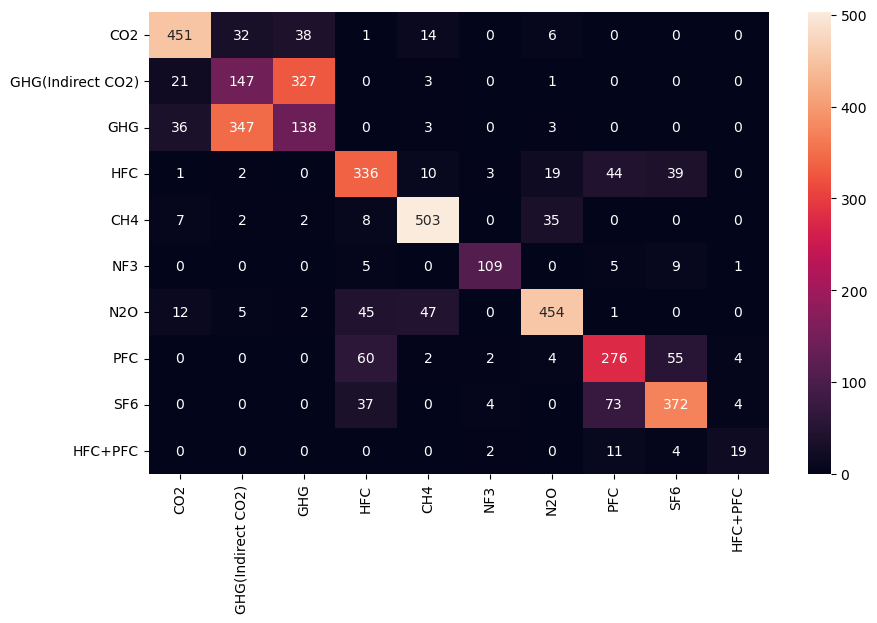

In [13]:
#################################################################
#                                                               #
#   ##### #   # #####  ####    ##### #   # ##### #####  ####    #
#   #     ##  # #     #        #   # # ##    #   #   # #        #
#   ###   # # # ###    ####    ##### ##      #   #####  ####    #
#   #     #  ## #          #   #   # # ##    #   #   #      #   #
#   ##### #   # #####  ####    #   # #   #   #   #   #  ####    #
#                                                               #
#   Gebze/KOCAELI Cumartesi Sabah                               #
#################################################################

import pandas as pd
from sklearn import preprocessing as ppg
from sklearn.model_selection import train_test_split as t2p,GridSearchCV
from sklearn.naive_bayes import CategoricalNB, GaussianNB,BernoulliNB,MultinomialNB,ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acc,confusion_matrix as cm
import seaborn as sns
import matplotlib.pyplot as plt

a=pd.read_csv("./emission_dataset.csv",encoding="unicode_escape")
data=a.copy()

ppgn=ppg.LabelEncoder()
data["country_or_area"]=ppgn.fit_transform(data["country_or_area"])
data["category"]=ppgn.fit_transform(data["category"])

X=data.drop("category",axis=1)
y=data["category"]
X_train,X_test,y_train,y_test=t2p(X,y,test_size=0.5)

agac_parametreleri={"criterion":["gini","entropy"],"max_depth":[2,5,10,20,30,90,120,150]}
arama_algoritmasi=GridSearchCV(DecisionTreeClassifier(),agac_parametreleri,cv=5)
arama_algoritmasi.fit(X_train,y_train)
best_params=arama_algoritmasi.best_params_

model=DecisionTreeClassifier(criterion=best_params["criterion"],max_depth=best_params["max_depth"])
md=model.fit(X_train,y_train)
pred=md.predict(X_test)
print("(DecisionTreeClassifier)Doğruluk oranı: ",acc(y_test,pred))

hata_matrixi=cm(y_test,pred)
index = ['CO2','GHG(Indirect CO2)','GHG',"HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"]
columns = ['CO2','GHG(Indirect CO2)','GHG',"HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"]   
hata_goster = pd.DataFrame(hata_matrixi,columns,index)
plt.figure(figsize=(10,6))
sns.heatmap(hata_goster, annot=True,fmt="d")

# model=GaussianNB()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print("(GaussianNB)Doğruluk oranı: ",acc(y_test,pred))

# model=CategoricalNB()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print("(CategoricalNB)Doğruluk oranı: ",acc(y_test,pred))

# model=BernoulliNB()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print("(BernoulliNB)Doğruluk oranı: ",acc(y_test,pred))

# model=MultinomialNB()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print("(MultinomialNB)Doğruluk oranı: ",acc(y_test,pred))

# model=KNeighborsClassifier()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print("(KNeighborsClassifier)Doğruluk oranı: ",acc(y_test,pred))


# model=ComplementNB()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# print("(ComplementNB)Doğruluk oranı: ",acc(y_test,pred))